# Lab 2d: Clasificación Multilabel (3 clases no excluyentes)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab2/blob/main/lab2d.ipynb)

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [157]:
import os
REPO_NAME = 'lab2'
if REPO_NAME not in os.getcwd():
    if not os.path.exists(REPO_NAME):
        !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
    os.chdir(REPO_NAME)

## Análisis Exploratorio.

Importar librerías

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Establecer GPU por defecto en caso de estar disponible

In [159]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), 'Physical GPUs,', len(logical_gpus), 'Logical GPUs')
    except RuntimeError as e:
        print(e)

Cargar y visualizar los datos.

In [160]:
data = pd.read_csv('dataset-lab2-multilabel.csv')
# Usar solo las dos primeras clases
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data[['Y0', 'Y1']].to_numpy()
print(data[['X1', 'X2', 'Y0', 'Y1']].head())

         X1        X2   Y0   Y1
0  0.832127  0.565868  1.0  1.0
1  0.297602  0.968891  1.0  1.0
2  0.366915  0.410391  0.0  0.0
3  0.717398  0.119898  1.0  0.0
4  0.242372  0.102828  0.0  0.0


Plot de los datos.

Negro: muestra con más de una clase. Rojo: clase 0, Verde: clase 1, Azul: clase 2, Gris: ninguna clase.

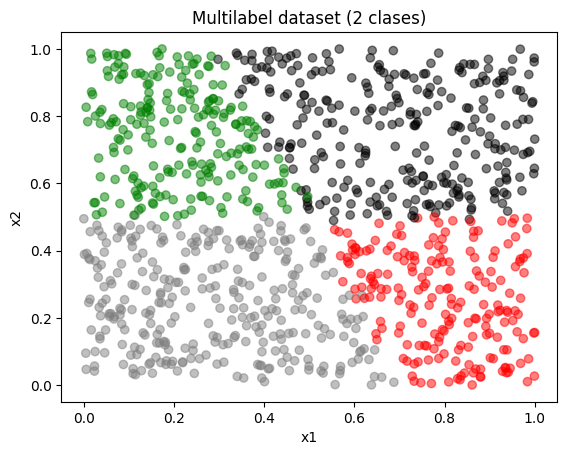

In [161]:
# Visualización para 2 clases
colors = []
for y in Y:
    if y.sum() > 1:
        colors.append('black')
    elif y[0]:
        colors.append('red')
    elif y[1]:
        colors.append('green')
    else:
        colors.append('gray')

plt.scatter(X1, X2, color=colors, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Multilabel dataset (2 clases)')
plt.show()

In [162]:
from sklearn.model_selection import train_test_split

# Split en 80% train, 20% validación
x = np.column_stack([X1, X2])
y = Y
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print('Train shape:', x_train.shape, y_train.shape)
print('Valid shape:', x_val.shape, y_val.shape)

Train shape: (800, 2) (800, 2)
Valid shape: (200, 2) (200, 2)


Definimos nuestro modelo usando tensorflow.

- Una salida por clase, activación sigmoide.
- Pérdida: binary_crossentropy.

In [163]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

Entrenamos el modelo.

*Nota: Usamos 'binary_crossentropy' para multilabel.*

In [164]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000, 2)
Epoch 1/50
32/32 [==============================] - 0s 484us/step - loss: 0.3310 - accuracy: 0.6450
Epoch 2/50
32/32 [==============================] - 0s 553us/step - loss: 0.1503 - accuracy: 0.7040
Epoch 3/50
32/32 [==============================] - 0s 494us/step - loss: 0.1181 - accuracy: 0.7030
Epoch 4/50
32/32 [==============================] - 0s 568us/step - loss: 0.1037 - accuracy: 0.7070
Epoch 5/50
32/32 [==============================] - 0s 449us/step - loss: 0.0925 - accuracy: 0.6920
Epoch 6/50
32/32 [==============================] - 0s 455us/step - loss: 0.0857 - accuracy: 0.6970
Epoch 7/50
32/32 [==============================] - 0s 453us/step - loss: 0.0816 - accuracy: 0.7010
Epoch 8/50
32/32 [==============================] - 0s 451us/step - loss: 0.0761 - accuracy: 0.6950
Epoch 9/50
32/32 [==============================] - 0s 441us/step - loss: 0.0753 - accuracy: 0.7150
Epoch 10/50
32/32 [==============================] - 0s 442us/step - loss: 0.067

Definimos una función para plotear la frontera de decisión sobre los datos.

Para multilabel, se plotea la frontera de cada clase por separado.

In [165]:
def plot_multilabel_results(X1, X2, Y, model):
    plt.figure(figsize=(10, 4))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.scatter(X1, X2, c=Y[:, i], cmap='coolwarm', alpha=0.5)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title(f'Frontera Clase {i}')
        x1 = np.linspace(0, 1, 100)
        x2 = np.linspace(0, 1, 100)
        xx1, xx2 = np.meshgrid(x1, x2)
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        y_pred = model.predict(grid)
        y_pred = y_pred[:, i].reshape(xx1.shape)
        plt.contour(xx1, xx2, y_pred, levels=[0.5], colors='k')
    plt.tight_layout()
    plt.show()

Plot de la frontera de decisión para cada clase.

313/313 [==============================] - 0s 279us/step


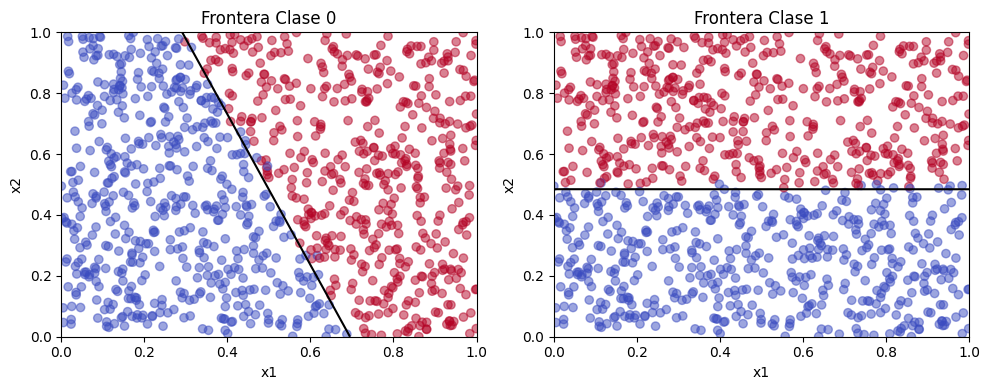

In [166]:
plot_multilabel_results(X1, X2, Y, model)

## Modelo más complejo

Probemos ahora con un modelo más complejo (capas ocultas, más neuronas, etc). Experimentar con la cantidad de capas, neuronas y funciones de activación.

In [167]:
# Definir un modelo más complejo para multilabel (2 clases)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [168]:
# Normalización de los datos de entrada
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Redefinir el modelo complejo con Dropout y activaciones ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=x_train_scaled, y=y_train, epochs=150, batch_size=32, validation_data=(x_val_scaled, y_val))

Epoch 1/150
25/25 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.6500 - val_loss: 0.1530 - val_accuracy: 0.7850
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.7212 - val_loss: 0.0695 - val_accuracy: 0.7350
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.7013 - val_loss: 0.0524 - val_accuracy: 0.6950
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.6737 - val_loss: 0.0660 - val_accuracy: 0.7100
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.6888 - val_loss: 0.0515 - val_accuracy: 0.6650
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.6837 - val_loss: 0.0544 - val_accuracy: 0.6900
Epoch 7/150
25/25 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.6475 - val_loss: 0.0533 - val_accuracy: 0.6600
Epoch 8/150
2

In [169]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x=x, y=y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8033 - accuracy: 0.6730
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8033 - accuracy: 0.6730
Epoch 2/100
32/32 [==============================] - 0s 667us/step - loss: 0.1991 - accuracy: 0.7190
Epoch 3/100
32/32 [==============================] - 0s 667us/step - loss: 0.1991 - accuracy: 0.7190
Epoch 3/100
32/32 [==============================] - 0s 681us/step - loss: 0.1154 - accuracy: 0.7380
Epoch 4/100
32/32 [==============================] - 0s 681us/step - loss: 0.1154 - accuracy: 0.7380
Epoch 4/100
32/32 [==============================] - 0s 672us/step - loss: 0.1098 - accuracy: 0.6940
Epoch 5/100
32/32 [==============================] - 0s 672us/step - loss: 0.1098 - accuracy: 0.6940
Epoch 5/100
32/32 [==============================] - 0s 614us/step - loss: 0.1429 - accuracy: 0.6440
Epoch 6/100
32/32 [==============================] - 0s 614us/step - loss: 0.1429 - accuracy: 0

313/313 [==============================] - 0s 287us/step


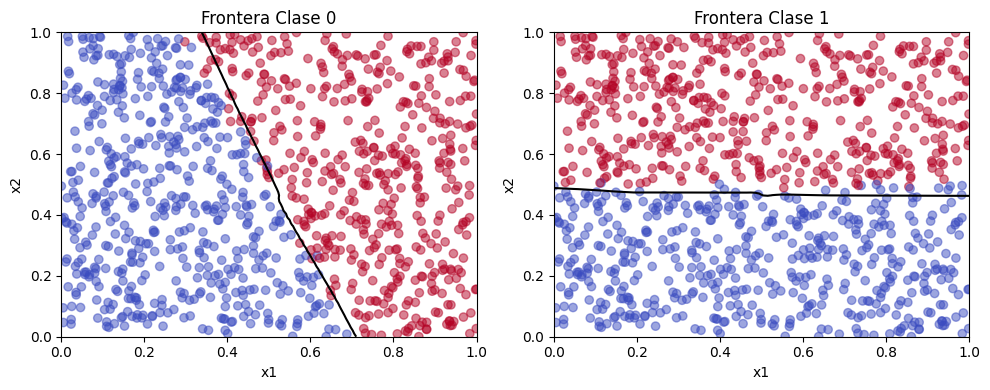

In [170]:
plot_multilabel_results(X1, X2, Y, model)